In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255, test_images / 255
train_images, test_images = train_images.reshape((60000, 28, 28, 1)), test_images.reshape((10000, 28, 28, 1))

In [3]:
class_labels = ["zero", "one", "two", "three", "four", "five", "six", "zeeum", "eight", "noin"]

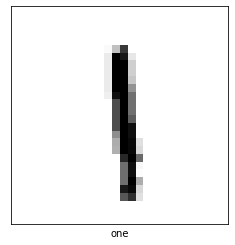

In [8]:
i = 8
plt.imshow(train_images[i].reshape((28,28)), cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.xlabel(class_labels[train_labels[i]])
plt.show()

In [48]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu",  input_shape=(28,28,1)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_13 (Dense)             (None, 10)              

In [50]:
model.compile(optimizer="adam", 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [51]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1515 - accuracy: 0.9539 - val_loss: 0.0494 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0487 - accuracy: 0.9848 - val_loss: 0.0499 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0267 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0160 - accuracy: 0.9946 - val_loss: 0.0362 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.0398 -

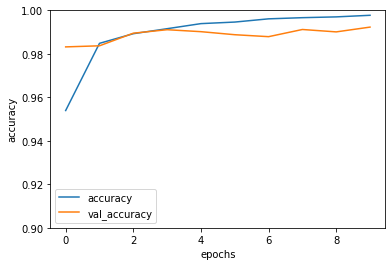

In [53]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0.9, 1)
plt.legend()

plt.show()